In [1]:
import sys
sys.path.append('/home/painchess/projects_clean/Simulations')
sys.path.append('/home/painchess/projects_clean/Halo_Analytical_Calculations')
import simulation as sm
import merger_rate as mr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker


In [2]:
params = {'legend.fontsize': 13,
          'legend.handlelength': 2}
plt.rcParams["figure.dpi"]= 150
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(params)

# Merger rates 

## At different mass ratios

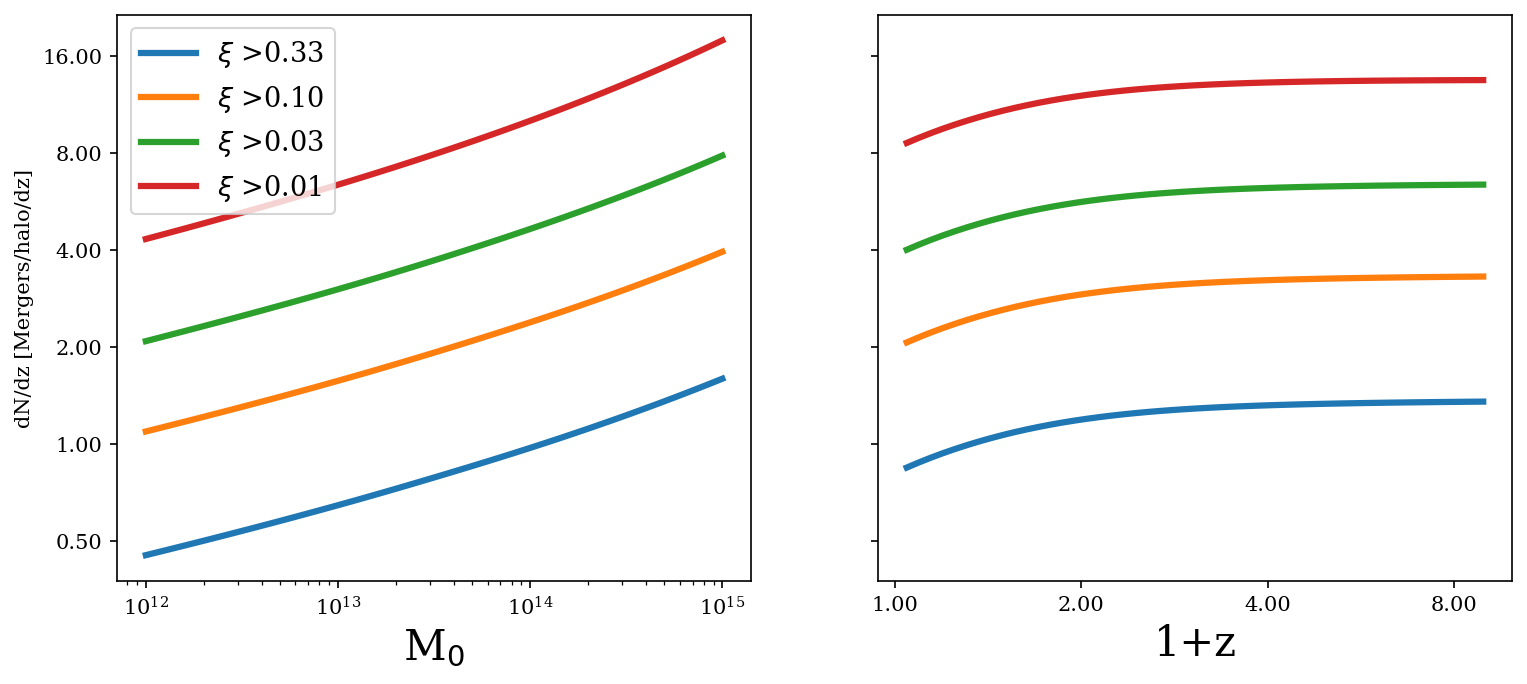

In [29]:
l=50
masses = np.logspace(12, 15, l)
zs = np.logspace(0, 0.95, l) -1
z0 = 0.06
ximins = [1/3, 1/10, 1/30, 1/100]
xmax = 1
fig, axs = plt.subplots(1, 2, figsize=[12,5], sharey=True)
for xm in ximins:
    res1, res2 = [], []
    for i in range(l):
        res1.append(mr.integ_mrate(masses[i], z0, xm, 1))
        res2.append(mr.integ_mrate(5e13, zs[i], xm, 1))
    axs[0].loglog(masses, res1, linewidth=3, label=r'$\xi$ >{:1.2f}'.format(xm))
    axs[1].loglog(1+zs, res2, linewidth=3)

axs[1].xaxis.set_minor_formatter(ticker.ScalarFormatter())
axs[1].xaxis.set_minor_locator(ticker.LogLocator(base=2, numticks=5))
axs[1].xaxis.set_major_locator(ticker.LogLocator(base=2, numticks=5))
axs[1].xaxis.set_major_formatter(ticker.ScalarFormatter())

axs[0].yaxis.set_minor_formatter(ticker.ScalarFormatter())
axs[0].yaxis.set_minor_locator(ticker.LogLocator(base=2, numticks=10))
axs[0].yaxis.set_major_locator(ticker.LogLocator(base=2, numticks=10))
axs[0].yaxis.set_major_formatter(ticker.ScalarFormatter())

#axs[1].xaxis.set_major_formatter(ticker.NullFormatter())

axs[0].set_xlabel('M$_0$', size=20)
axs[1].set_xlabel('1+z', size=20)
axs[0].set_ylabel('dN/dz [Mergers/halo/dz]')
axs[0].legend()
plt.savefig('./figs/dndz_vs_M.png', dpi=350, facecolor='white', transparent=False)
plt.savefig('./figs/dndz_vs_M.pdf', dpi=350, facecolor='white', transparent=False)


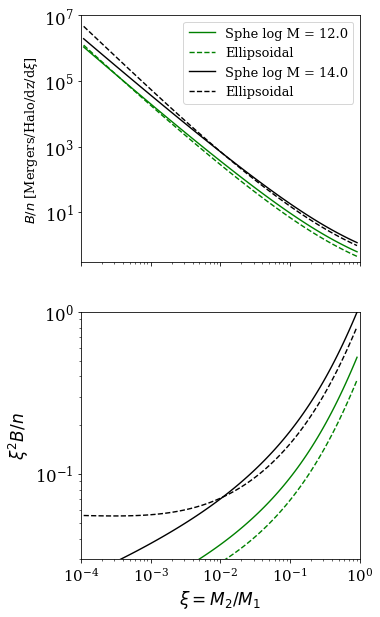

In [4]:
xi = np.logspace(-4, 0, 100)
masses = [1e12, 1e14]
red = 0.1
colors = ['green', 'black']
fig, axs = plt.subplots(2,1, sharex=True, figsize=[5, 10])
for i in range(len(masses)):
    M0 = masses[i]
    axs[0].loglog(xi[1:-1], mr.sph_mrate_per_n(M0, red, xi), color = colors[i], linewidth=1.4, label='Sphe log M = {:2.1f}'.format(np.log10(M0)))
    axs[0].loglog(xi[1:-1], mr.ell_mrate_per_n(M0, red, xi),'--', color = colors[i], linewidth=1.4, label='Ellipsoidal'.format(np.log10(M0)))
    axs[1].loglog(xi[1:-1], xi[1:-1]**2*mr.sph_mrate_per_n(M0, red, xi), color = colors[i], linewidth=1.4)
    axs[1].loglog(xi[1:-1], xi[1:-1]**2*mr.ell_mrate_per_n(M0, red, xi),'--', color = colors[i], linewidth=1.4)

axs[1].set_xlabel(r'$\xi = M_2/M_1$', size=17)
axs[1].tick_params(axis='x', labelsize=15)
axs[0].set_ylim(0.3, 1e7)
axs[1].set_ylim(0.03, 1)
axs[0].set_ylabel(r'$B/n$ [Mergers/Halo/dz/d$\xi$]', size=13)
axs[0].tick_params(axis='y', labelsize=16.5)

axs[1].set_ylabel(r'$\xi^2B/n$', size=17)
axs[1].tick_params(axis='y', labelsize=16.5)
plt.xlim(1e-4, 1)
axs[0].legend()
np.savetxt('./data/B_over_n_xi2_panel1.txt', np.array([xi[1:-1], mr.sph_mrate_per_n(M0, red, xi), mr.ell_mrate_per_n(M0, red, xi)]))
plt.savefig('./figs/B_over_n_xi2.pdf', dpi=650, bbox_inches='tight', facecolor='white',transparent=False)
plt.savefig('./figs/B_over_n_xi2.png', dpi=650, bbox_inches='tight', facecolor='white',transparent=False)

## Merger rates vs cosmology 

## One figure 

/tmp/ipykernel_10370/2444522606.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()], fontsize=15)


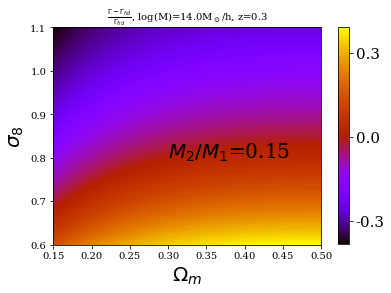

In [4]:
s = [0.3, 1]
masses = [5e11, 5e12, 5e13, 1e14]
sze = 15
omv = np.linspace(0.15, 0.5, sze)
s8 = np.linspace(0.6, 1.1, sze)
nom = np.zeros((sze,sze))
nom2 = np.zeros((sze,sze))
x = np.array([omv]*sze).transpose()
y = np.array([s8]*sze)
xis = [0.05, 0.15, 0.5]
save=False
pern = True
ratio = True
red=0.3
k, l = 3, 1
mass = masses[k]
xi = xis[l]
ax = plt.gca()
for i in range(sze):
    for j in range(sze):
        if pern:
            nom [i,j] = mr.sph_mrate_per_n(mass, red, xi, om0=omv[i], ol0=1-omv[i], sig8=s8[j], colos=True)
        else:
            nom [i,j] = mr.lc_mrate(mass, red, xi, prescription1=False, om0=omv[i], ol0=1-omv[i], sig8=s8[j], colos=True)
fid = mr.sph_mrate_per_n(mass, red, xi, om0=0.3, ol0=0.7, sig8=0.8, colos=True)

if ratio:
    im = ax.contourf(x, y, (nom-fid)/fid, levels=100, cmap='gnuplot')
else:
    im = ax.contourf(x, y, nom, levels=100, cmap='gnuplot')
ax.annotate('$M_2/M_1$={:1.2f}'.format(xis[l]), (0.3, 0.8), size=20)
fig = plt.gcf()
cbar = fig.colorbar(im, ax=ax)
ax.set_ylabel('$\sigma_8$', size=20)
tick_locator = ticker.MaxNLocator(nbins=3)
cbar.locator = tick_locator
cbar.update_ticks()
cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()], fontsize=15)
#ax.set_xticklabels(x, fontsize=15)
#ax.set_xticklabels(y, fontsize=15)
ax.set_title(r'$\frac{\Gamma - \Gamma_{fid}}{\Gamma_{fid}}$' +', log(M)={:2.1f}'.format(np.log10(masses[k]))+ 'M$_\odot$/h, z=0.3', size=10)

ax.set_xlabel('$\Omega_m$', size=20)      
        
#plt.savefig('./figs/unique_sph_mrate_per_n_xi_{:1.0}_M_{:2.0e}_z1_ratio.pdf'.format(100*xi, mass), dpi=650, bbox_inches='tight', facecolor='white',transparent=False)
#plt.savefig('./figs/unique_sph_mrate_per_n_xi_{:1.0}_M_{:2.0e}_z1_ratio.png'.format(100*xi, mass), dpi=650, bbox_inches='tight', facecolor='white',transparent=False)
plt.show()

## Different redshifts and ratios 

/tmp/ipykernel_51351/184051111.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])
/tmp/ipykernel_51351/184051111.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()], fontsize=16.5)
/tmp/ipykernel_51351/184051111.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])
/tmp/ipykernel_51351/184051111.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()], fontsize=16.5)


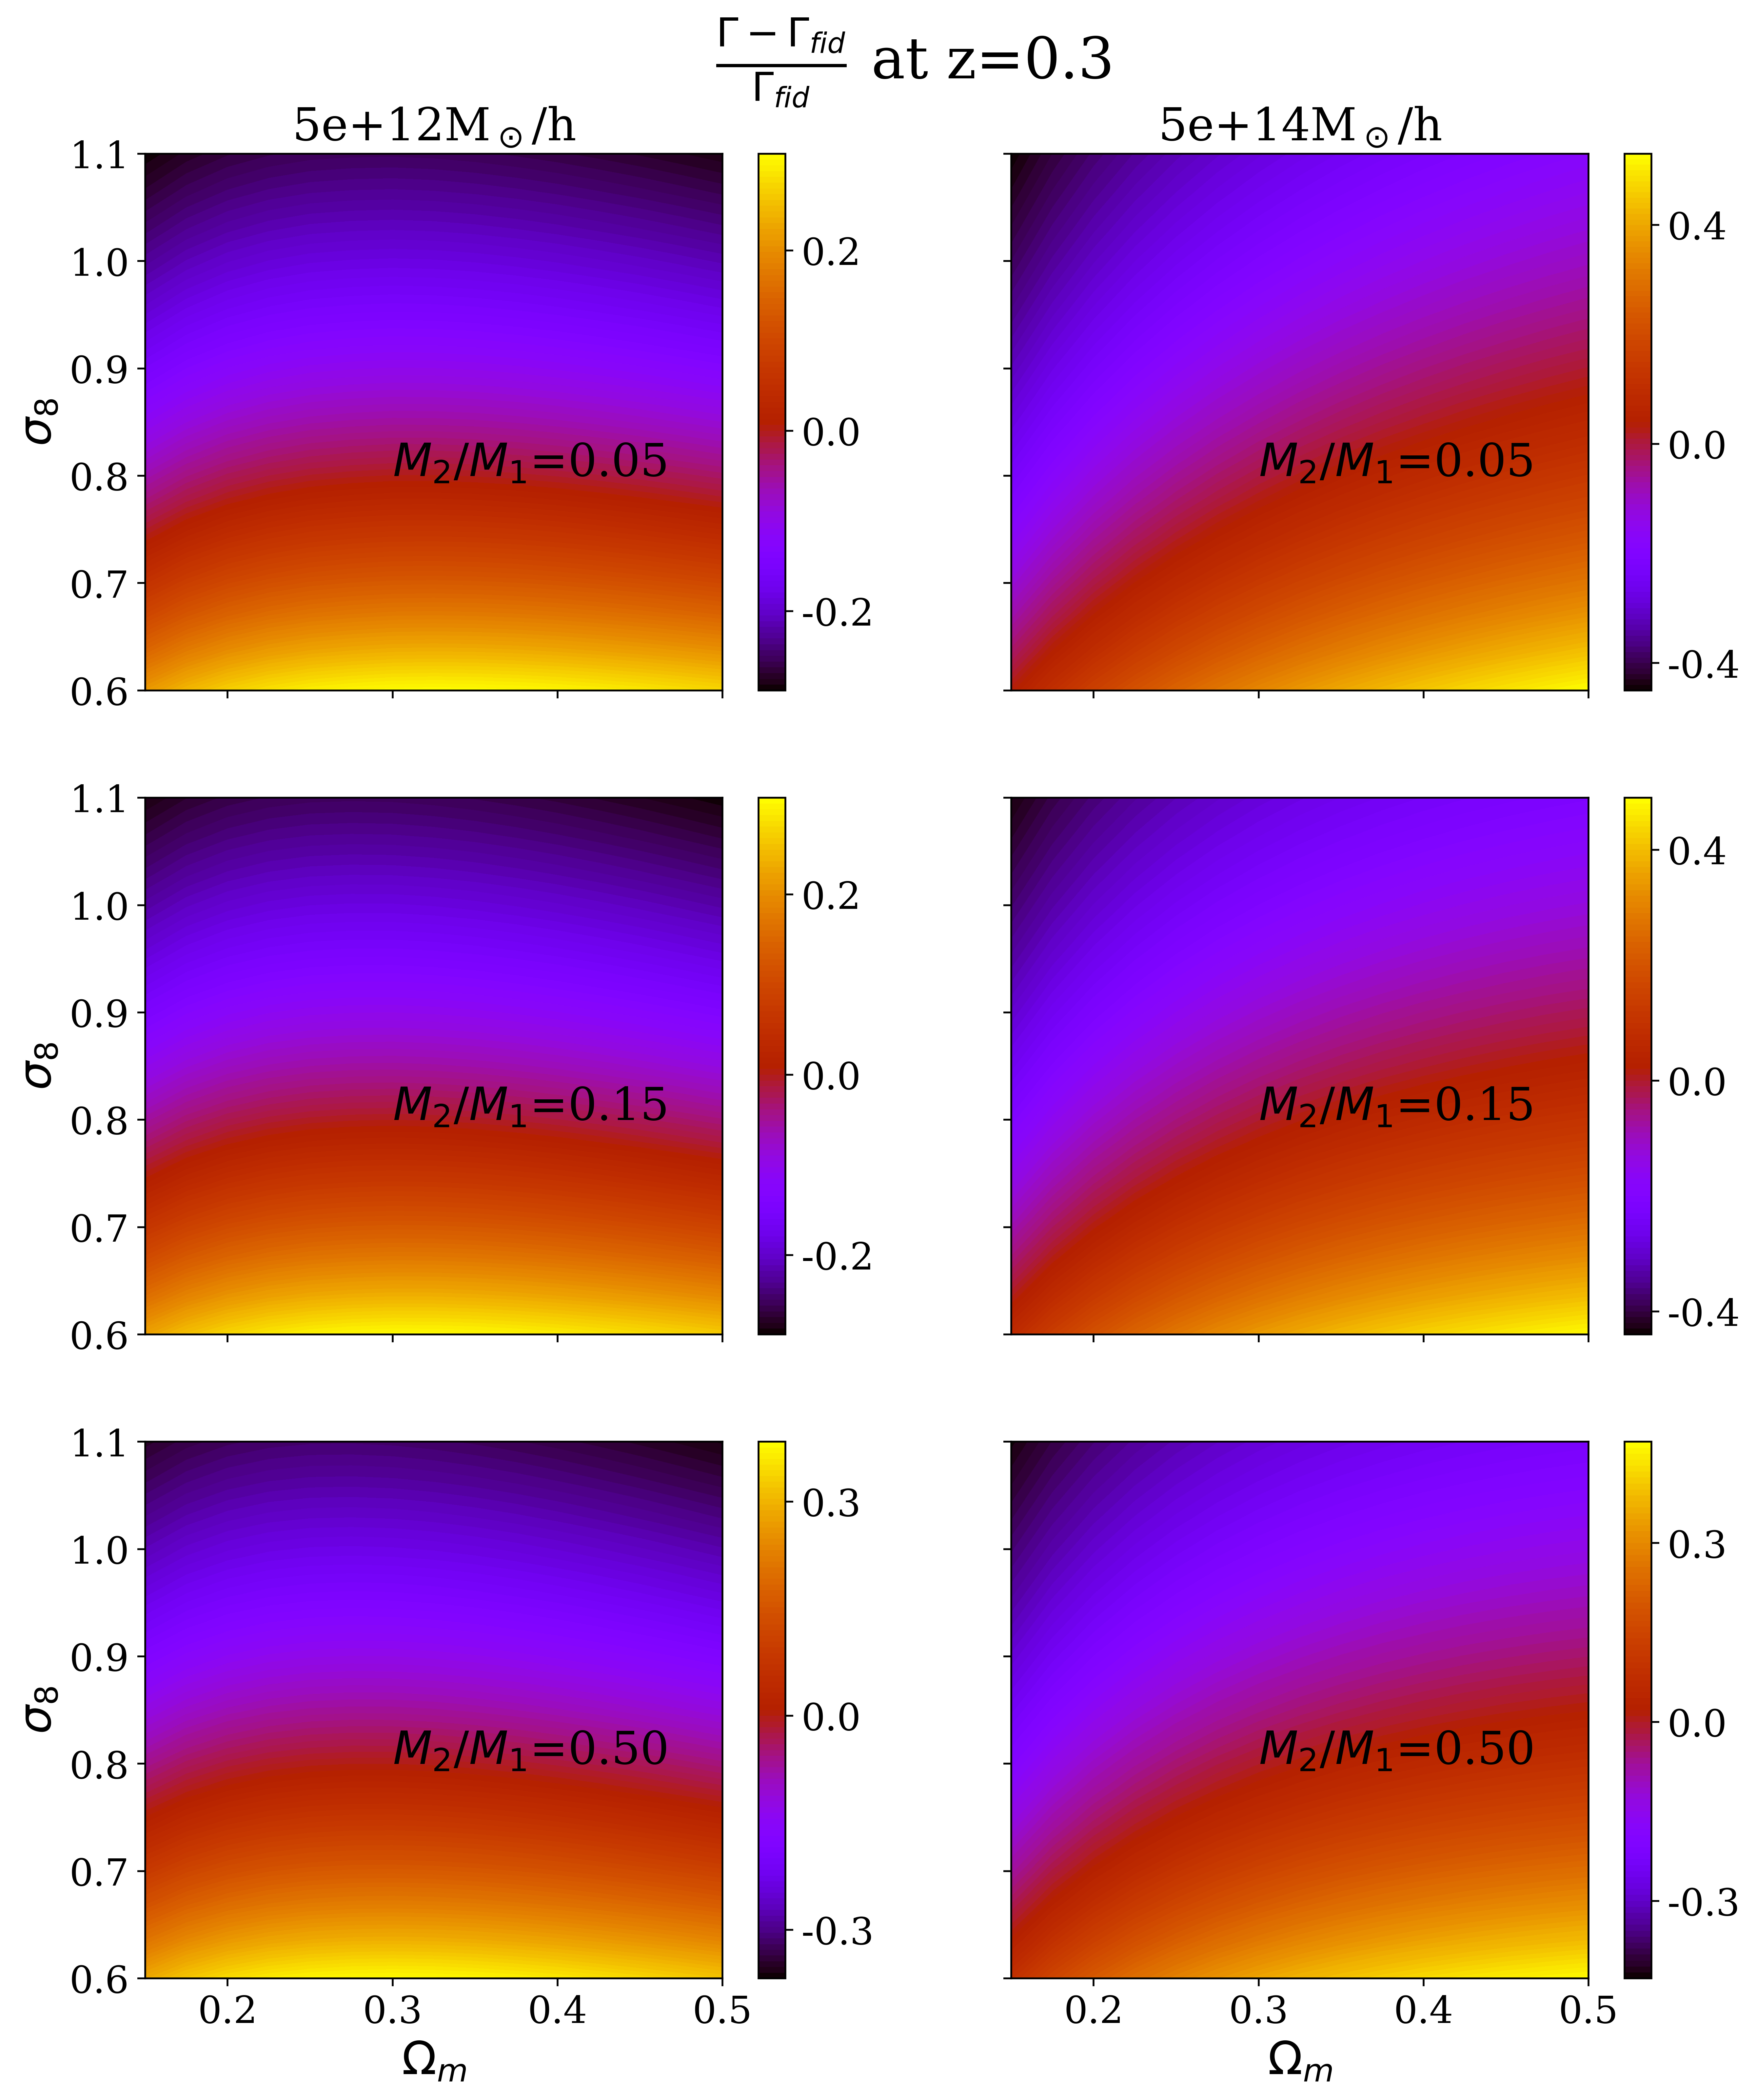

In [5]:
zs = [0.3, 1]
masses = [5e12,  5e14]

sze = 15
 
omv = np.linspace(0.15, 0.5, sze)
s8 = np.linspace(0.6, 1.1, sze)
nom = np.zeros((sze,sze))
nom2 = np.zeros((sze,sze))
x = np.array([omv]*sze).transpose()
y = np.array([s8]*sze)
xis = [0.05, 0.15, 0.5]
pern = True
ratio = True
red=0.3
fig, axs = plt.subplots(3, 2, dpi=500, figsize= [12.5,14], sharex=True, sharey=True)
for k in range(len(masses)):
    mass = masses[k]
    for l in range(len(xis)):
        xi = xis[l]
        for i in range(sze):
            for j in range(sze):
                if pern:
                    nom [i,j] = mr.ell_mrate_per_n(mass, red, xi, om0=omv[i], ol0=1-omv[i], sig8=s8[j], colos=True)
                else:
                    nom [i,j] = mr.lc_mrate(mass, red, xi, prescription1=False, om0=omv[i], ol0=1-omv[i], sig8=s8[j], colos=True)
        fid = mr.ell_mrate_per_n(mass, red, xi, om0=0.3, ol0=0.7, sig8=0.8, colos=False)
        ax = axs[l, k]
        ax.tick_params(axis='x', labelsize=16.5)
        ax.tick_params(axis='y', labelsize=16.5)
        if ratio:
            im = ax.contourf(x, y, (nom-fid)/fid, levels=100, cmap='gnuplot')
        else:
            im = ax.contourf(x, y, nom, levels=100, cmap='gnuplot')
        ax.annotate('$M_2/M_1$={:1.2f}'.format(xis[l]), (0.3, 0.8), size=20)
        cbar = fig.colorbar(im, ax=ax)
        if k == 0:
            ax.set_ylabel('$\sigma_8$', size=20)
            tick_locator = ticker.MaxNLocator(nbins=3)
            cbar.locator = tick_locator
            cbar.update_ticks()
            cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])
            cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()], fontsize=16.5)
        else:
            tick_locator = ticker.MaxNLocator(nbins=3)
            cbar.locator = tick_locator
            cbar.update_ticks()
            cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])
            cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()], fontsize=16.5)
        if l==0:
            if pern:
                ax.set_title('{:2.1}M$_\odot$/h'.format(masses[k]), size=20)
            else:
                ax.set_title('dp/dlogMdz {:2.1}$M_\odot/h$'.format(masses[k]), size=20)
        if l == 2:
            ax.set_xlabel('$\Omega_m$', size=20)

fig.suptitle(r'$\frac{\Gamma - \Gamma_{fid}}{\Gamma_{fid}}$' +' at z={}'.format(red), size=25)
plt.subplots_adjust(top=0.92)
plt.savefig('./figs/ell_mrate_per_n_xi_{:1.0}_M_{:2.0e}_z{}_ratio.pdf'.format(100*xi, mass, red), dpi=650, bbox_inches='tight', facecolor='white',transparent=False)
plt.savefig('./figs/ell_mrate_per_n_xi_{:1.0}_M_{:2.0e}_z{}_ratio.png'.format(100*xi, mass, red), dpi=350, bbox_inches='tight', facecolor='white',transparent=False)

plt.show()

# Average growth 

## One figure

/tmp/ipykernel_20440/1458592520.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])


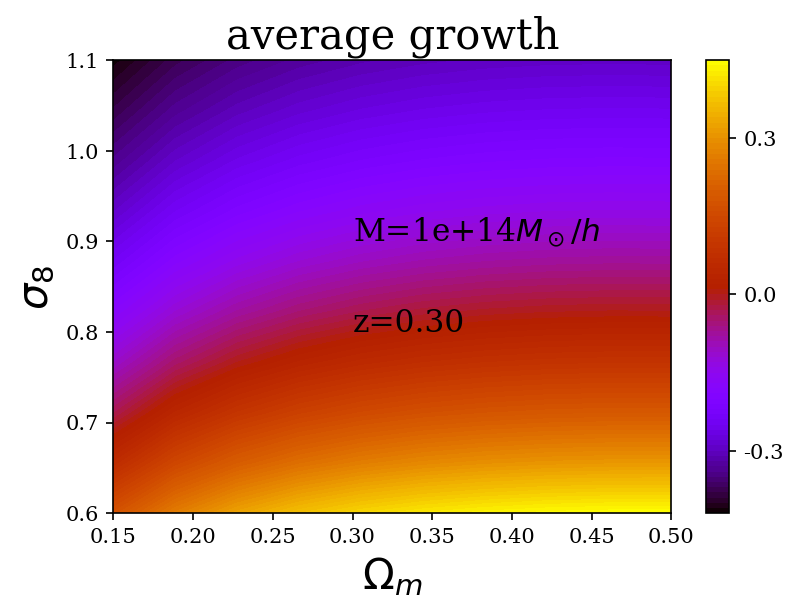

In [12]:
masses = [5e13, 5e14]
sze = 10
omv = np.linspace(0.15, 0.5, sze)
s8 = np.linspace(0.6, 1.1, sze)
nom, nom2 = np.zeros((sze,sze)), np.zeros((sze,sze))
x, y = np.array([omv]*sze).transpose(), np.array([s8]*sze)
nzbins = 20
#zfs = [0.05,  1.5]
zf = .3
save =True
mass = 1e14
for i in range(sze):
        zs, dz = sm.get_zlastdyn(zf, h=0.7, om=omv[i], zbins=nzbins)
        for j in range(sze):  
            nom[i,j] = sm.average_growth_analytical(mass, zs, s8[j], omv[i], nxibins=10000)

zs_fid, dz_fid = sm.get_zlastdyn(zf, h=0.7, om=0.3, zbins=nzbins)
resfid = sm.average_growth_analytical(mass, zs_fid, 0.8, 0.3, nxibins=10000)

ax = plt.gca()

im = ax.contourf(x, y, (nom-resfid)/resfid, levels=100, cmap='gnuplot')

ax.annotate('z={:1.2f}'.format(zf), (0.3, 0.8), size=15)
ax.annotate('M={:2.1}$M_\odot/h$'.format(mass), (0.3, 0.9), size=15)

cbar = fig.colorbar(im, ax=ax)

ax.set_ylabel('$\sigma_8$', size=20)
tick_locator = ticker.MaxNLocator(nbins=3)
cbar.locator = tick_locator
cbar.update_ticks()
cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])

ax.set_title('average growth' , size=20)

ax.set_xlabel('$\Omega_m$', size=20)
            
plt.savefig('./figs/unique_av_growth_vs_cosmo2.pdf', dpi=650, bbox_inches='tight', facecolor='white',transparent=False)       
plt.savefig('./figs/unique_av_growth_vs_cosmo2.png', dpi=650, bbox_inches='tight', facecolor='white',transparent=False)       

plt.show()



## Different Masses and redshifts

/tmp/ipykernel_51351/3385886169.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])
/tmp/ipykernel_51351/3385886169.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()], fontsize=16.5)
/tmp/ipykernel_51351/3385886169.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])
/tmp/ipykernel_51351/3385886169.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()], fontsize=16.5)


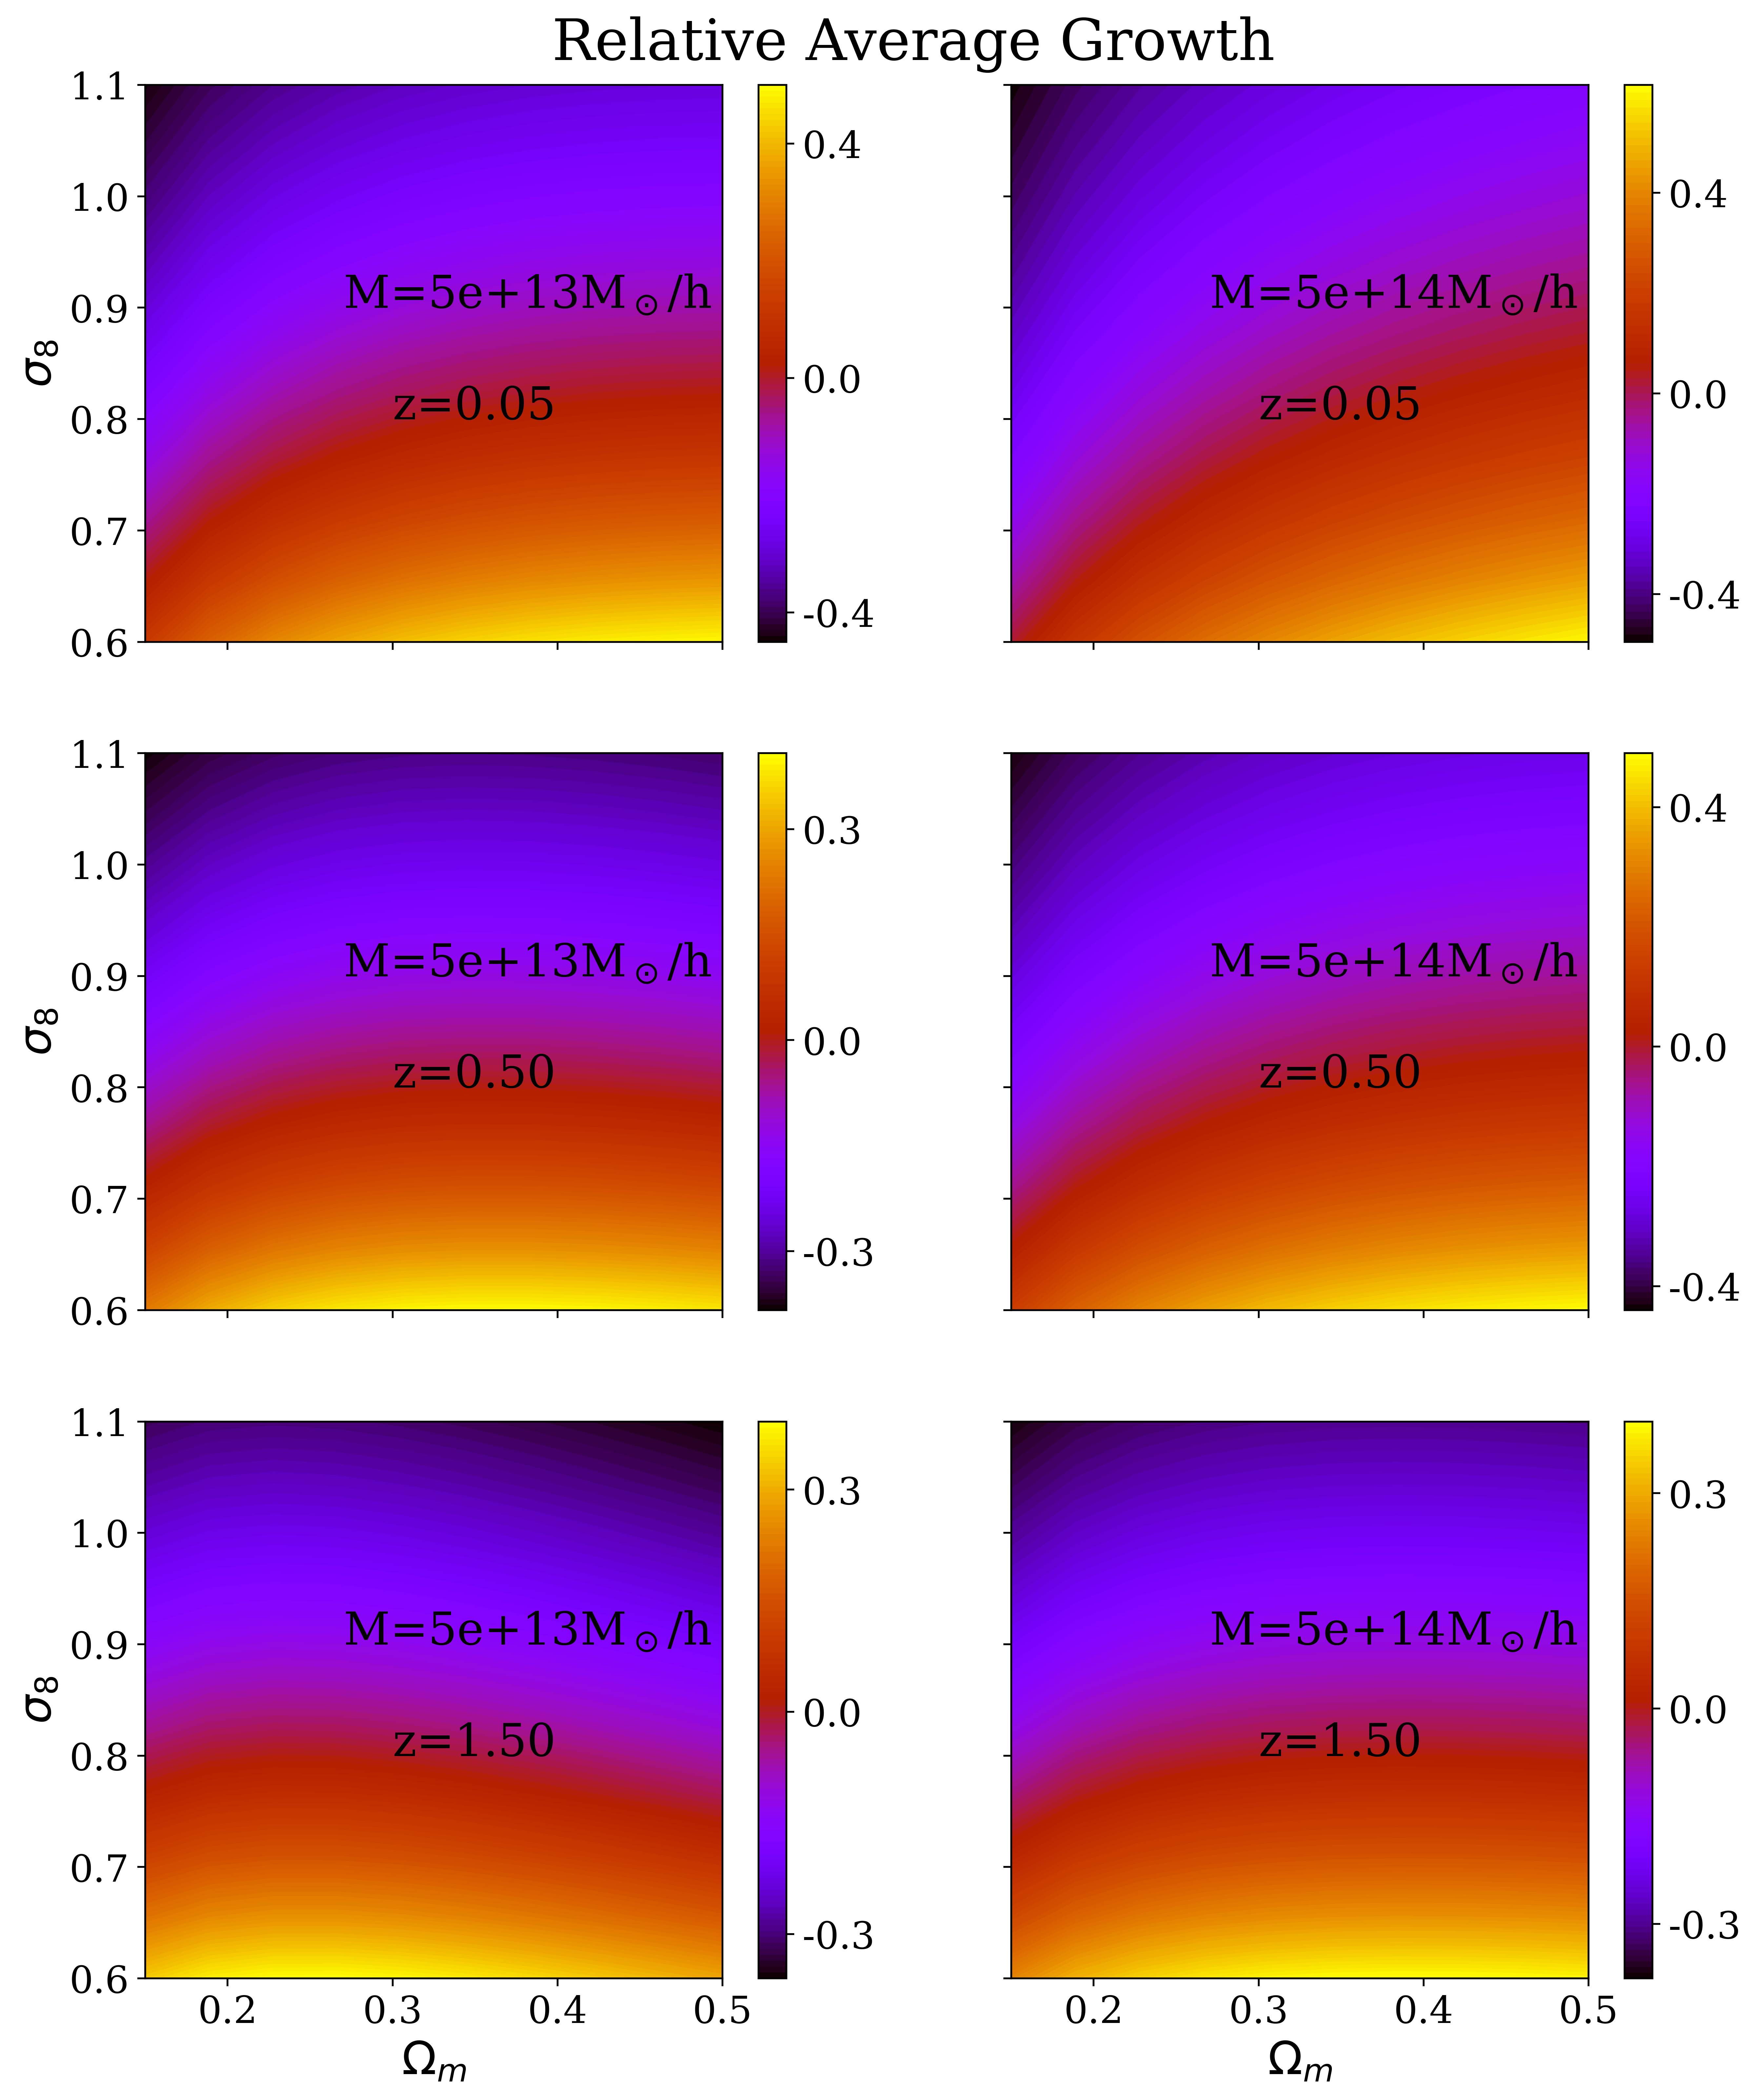

In [6]:
masses = [5e13, 5e14]
sze = 10
omv = np.linspace(0.15, 0.5, sze)
s8 = np.linspace(0.6, 1.1, sze)
nom, nom2 = np.zeros((sze,sze)), np.zeros((sze,sze))
x, y = np.array([omv]*sze).transpose(), np.array([s8]*sze)
nzbins = 20
zfs = [0.05, 0.5, 1.5]

fig, axs = plt.subplots(3, 2, dpi=500, figsize= [12.5,14], sharex=True, sharey=True)

save =True
if save:
    full_res = np.zeros((3,2,sze, sze))
else:
    full_res = np.load('./data/av_growth_2_2.npy')
for k in range(len(zfs)):
    zf = zfs[k]
    for l in range(len(masses)):
        mass = masses[l]
        if save:
            for i in range(sze):
                    zs, dz = sm.get_zlastdyn(zf, h=0.7, om=omv[i], zbins=nzbins)
                    for j in range(sze):  
                        res = []
                        nom[i,j] = sm.average_growth_analytical(mass, zs, s8[j], omv[i], nxibins=10000)
                    
            full_res[k, l] = nom
        else:
            nom = full_res[k, l]

        zs_fid, dz_fid = sm.get_zlastdyn(zf, h=0.7, om=0.3, zbins=nzbins)
        resfid = mr.average_growth_analytical(mass, zs_fid, 0.8, 0.3, nxibins=10000)
        ax = axs[k,l]
        ax.tick_params(axis='x', labelsize=16.5)
        ax.tick_params(axis='y', labelsize=16.5)
        im = ax.contourf(x, y, (nom-resfid)/resfid, levels=100, cmap='gnuplot')
        ax.annotate('z={:1.2f}'.format(zf), (0.3, 0.8), size=20)
        ax.annotate('M={:2.1}M$_\odot$/h'.format(masses[l]), (0.27, 0.9), size=20)
        
        cbar = fig.colorbar(im, ax=ax)
        if l == 0:
            ax.set_ylabel('$\sigma_8$', size=20)
            tick_locator = ticker.MaxNLocator(nbins=3)
            cbar.locator = tick_locator
            cbar.update_ticks()
            cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])
            cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()], fontsize=16.5)
        else:
            tick_locator = ticker.MaxNLocator(nbins=3)
            cbar.locator = tick_locator
            cbar.update_ticks()
            cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])
            cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()], fontsize=16.5)
        if k == 2:
            ax.set_xlabel('$\Omega_m$', size=20)

plt.suptitle('Relative Average Growth', size=25)
plt.subplots_adjust(top=0.95)
plt.savefig('./figs/av_growth_vs_cosmo_relat.pdf', dpi=650, bbox_inches='tight', facecolor='white',transparent=False)       
plt.savefig('./figs/av_growth_vs_cosmo_relat.png', dpi=350, bbox_inches='tight', facecolor='white',transparent=False)       
plt.show()



# Large growth 

## Unique

/tmp/ipykernel_20440/117944223.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])


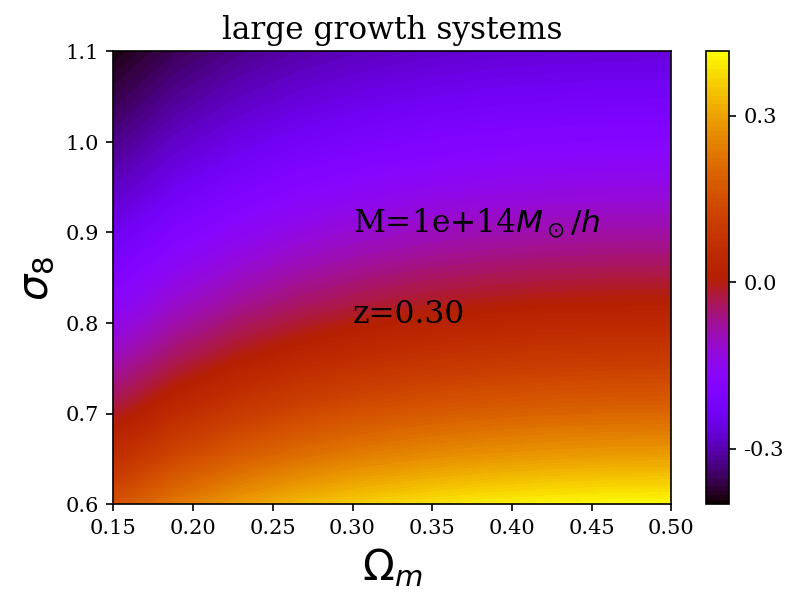

In [13]:
masses = [5e13, 5e14]
mass = 1e14
sze = 10
omv = np.linspace(0.15, 0.5, sze)
s8 = np.linspace(0.6, 1.1, sze)
nom, nom2 = np.zeros((sze,sze)), np.zeros((sze,sze))
x, y = np.array([omv]*sze).transpose(), np.array([s8]*sze)
nzbins = 20
zf = 0.3

save =True
if save:
    full_res = np.zeros((3,2,sze, sze))
else:
    full_res = np.load('large_growth_3_2.npy')


for i in range(sze):
    zs, dz = sm.get_zlastdyn(zf, h=0.7, om=omv[i], zbins=nzbins)
    for j in range(sze):
        nom [i,j] = sm.large_growth_analytical(mass, zs, s8[j], omv[i], nxibins=10000)

zs_fid, dz_fid = sm.get_zlastdyn(zf, h=0.7, om=0.3, zbins=nzbins)
resfid = sm.large_growth_analytical(mass, zs_fid, 0.8, 0.3, nxibins=10000)
ax = plt.gca()

im = ax.contourf(x, y, (nom-resfid)/resfid, levels=100, cmap='gnuplot')

ax.annotate('z={:1.2f}'.format(zf), (0.3, 0.8), size=15)
ax.annotate('M={:2.1}$M_\odot/h$'.format(mass), (0.3, 0.9), size=15)

cbar = fig.colorbar(im, ax=ax)

ax.set_ylabel('$\sigma_8$', size=20)
tick_locator = ticker.MaxNLocator(nbins=3)
cbar.locator = tick_locator
cbar.update_ticks()
cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])


ax.set_title('large growth systems' , size=15)

ax.set_xlabel('$\Omega_m$', size=20)


         
plt.savefig('./figs/unique_large_growth_vs_cosmo.pdf', dpi=650, bbox_inches='tight', facecolor='white',transparent=False)       
plt.savefig('./figs/unique_large_growth_vs_cosmo.png', dpi=650, bbox_inches='tight', facecolor='white',transparent=False)       

plt.show()



## Different masses and redshifts

/tmp/ipykernel_51351/2588648978.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])
/tmp/ipykernel_51351/2588648978.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()], fontsize=16.5)
/tmp/ipykernel_51351/2588648978.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])
/tmp/ipykernel_51351/2588648978.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()], fontsize=16.5)


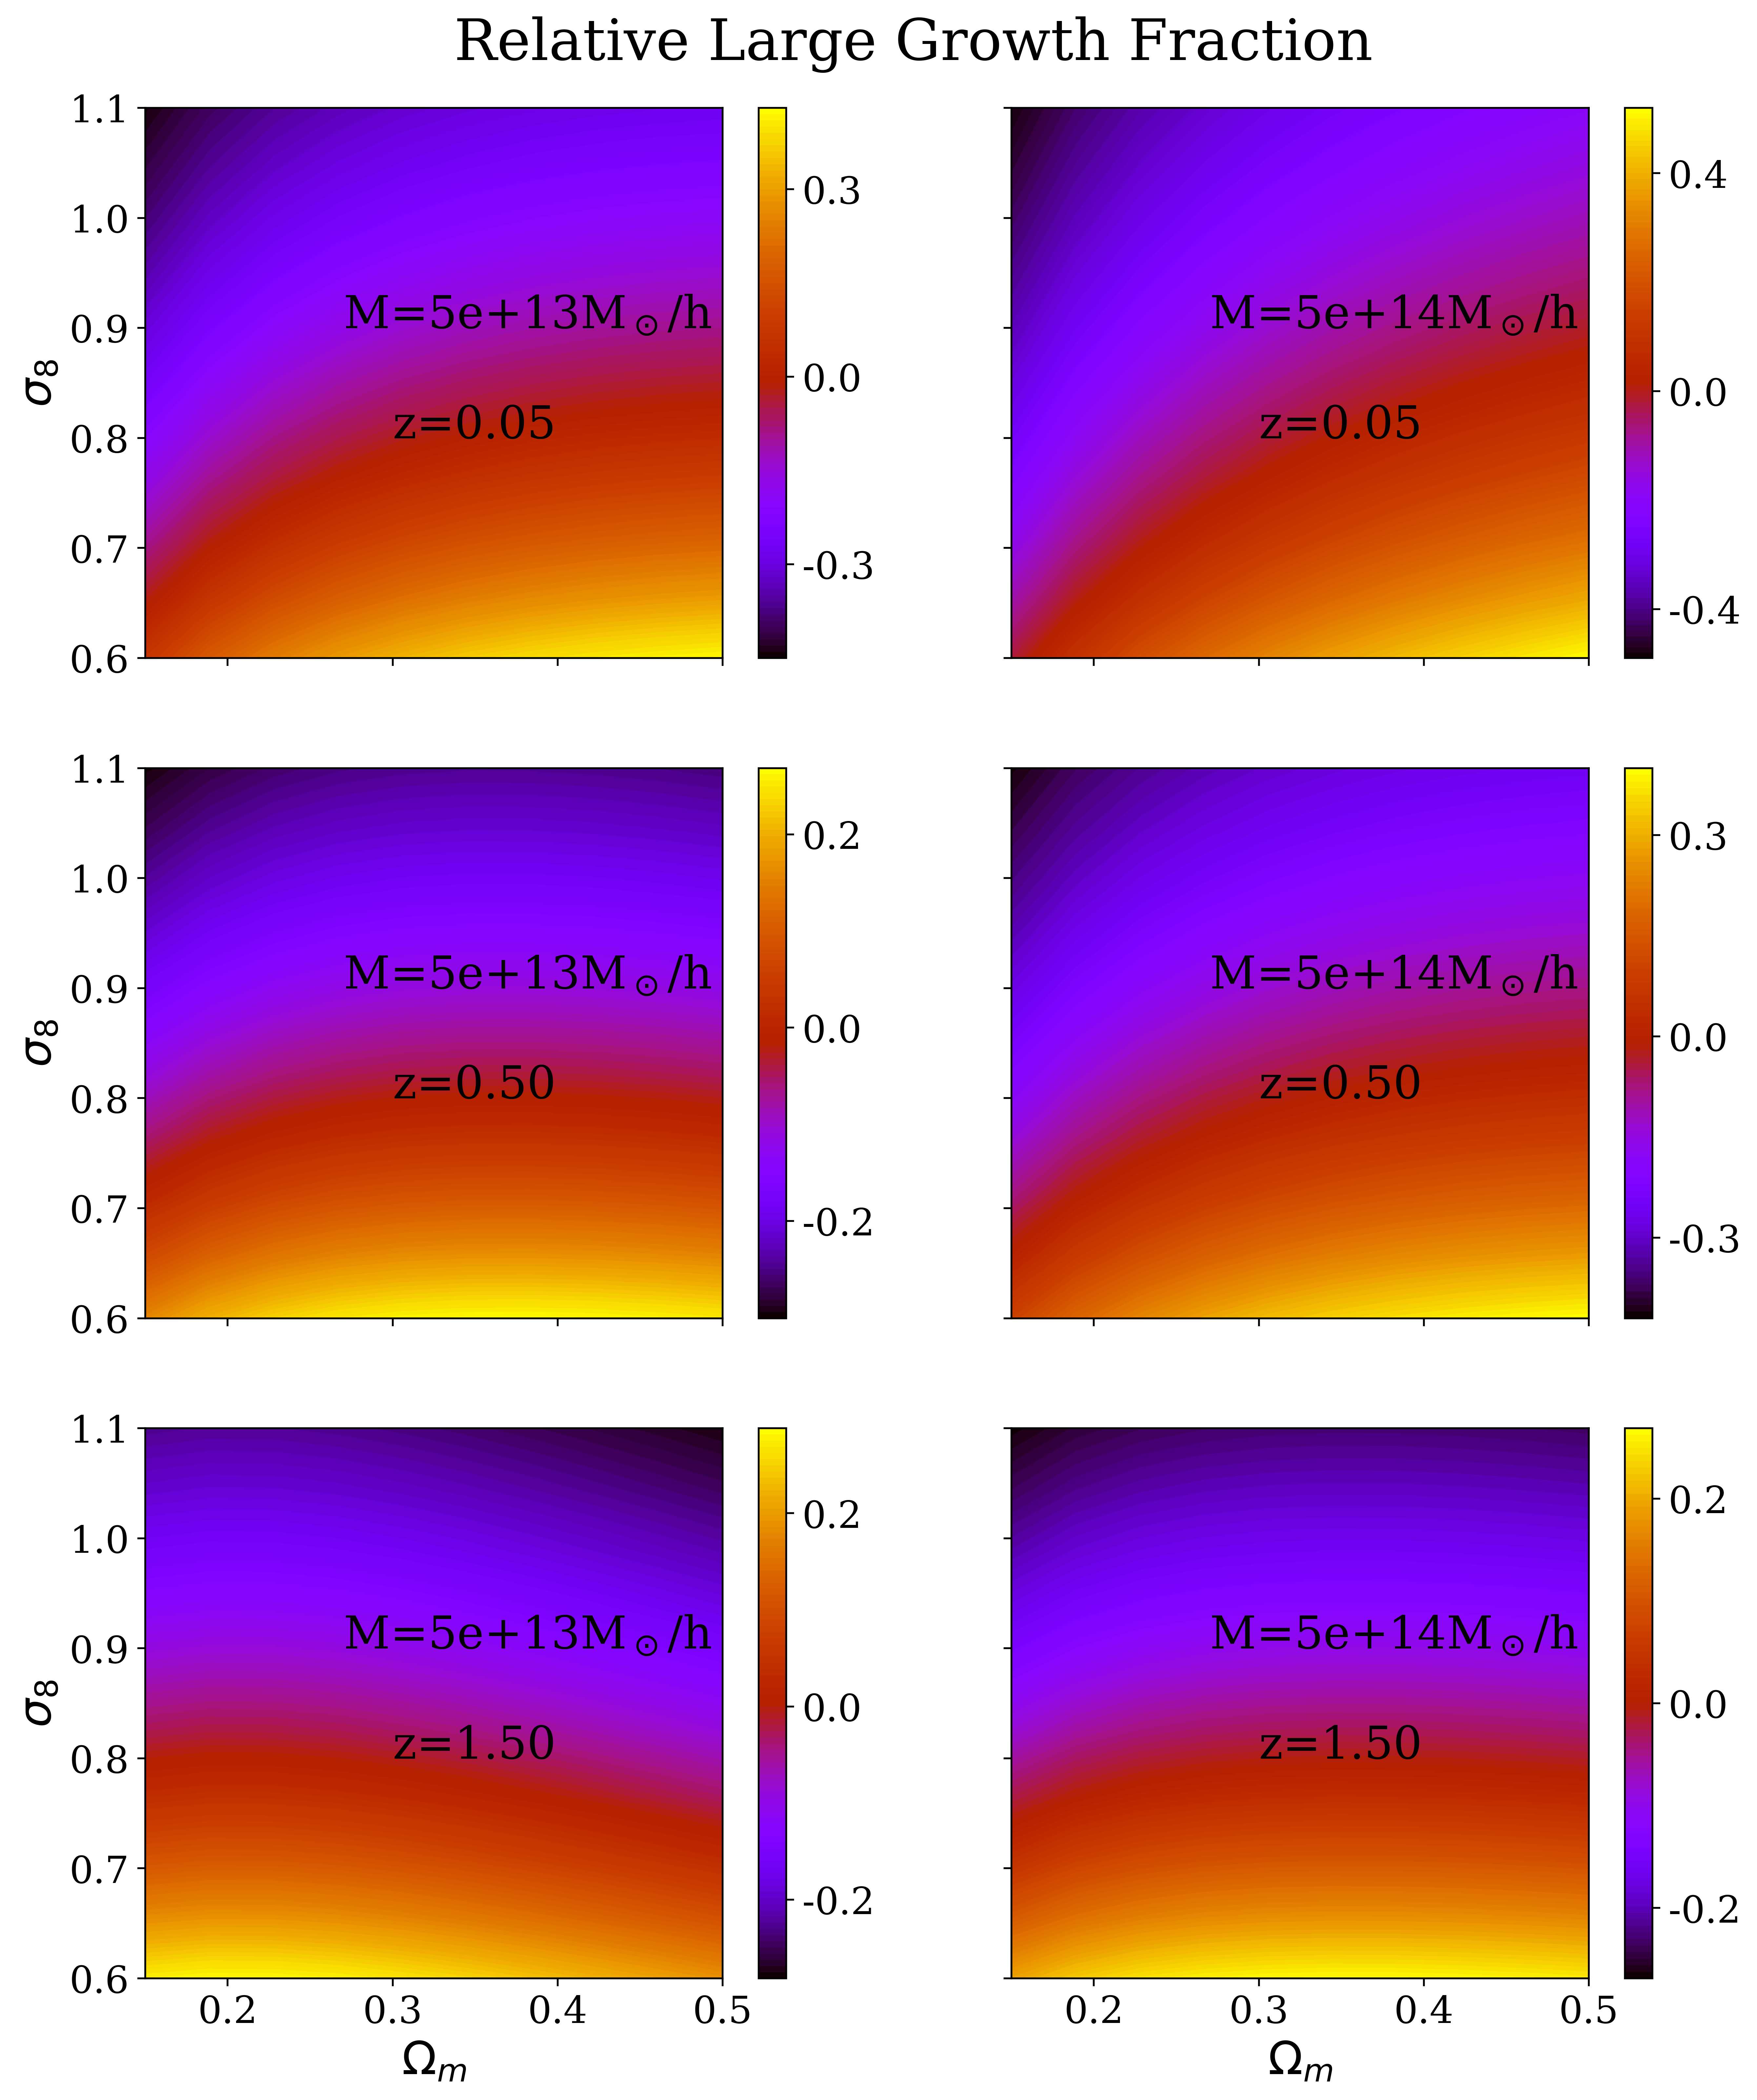

In [7]:
masses = [5e13, 5e14]
sze = 10
omv = np.linspace(0.15, 0.5, sze)
s8 = np.linspace(0.6, 1.1, sze)
nom, nom2 = np.zeros((sze,sze)), np.zeros((sze,sze))
x, y = np.array([omv]*sze).transpose(), np.array([s8]*sze)
nzbins = 20
zfs = [0.05, 0.5, 1.5]

fig, axs = plt.subplots(3, 2, dpi=500, figsize= [12.5,14], sharex=True, sharey=True)

save =True
if save:
    full_res = np.zeros((3,2,sze, sze))
else:
    full_res = np.load('large_growth_3_2.npy')
for k in range(len(zfs)):
    zf = zfs[k]
    for l in range(len(masses)):
        mass = masses[l]
        if save:
            for i in range(sze):
                zs, dz = sm.get_zlastdyn(zf, h=0.7, om=omv[i], zbins=nzbins)
                for j in range(sze):
                    nom [i,j] = sm.large_growth_analytical(mass, zs, s8[j], omv[i], nxibins=10000)
            full_res[k, l] = nom
        else:
            nom = full_res[k, l]
        
        zs_fid, dz_fid = sm.get_zlastdyn(zf, h=0.7, om=0.3, zbins=nzbins)
        resfid = sm.large_growth_analytical(mass, zs, 0.8, 0.3, nxibins=10000)
        ax = axs[k,l]
        ax.tick_params(axis='x', labelsize=16.5)
        ax.tick_params(axis='y', labelsize=16.5)
        #im = ax.contourf(x, y, nom, levels=100, cmap='gnuplot')
        im = ax.contourf(x, y, (nom-resfid)/resfid, levels=100, cmap='gnuplot')
        #ax.annotate('{:2.1}$M_\odot/h$'.format(masses[k]), (0.3, 0.9))
        ax.annotate('z={:1.2f}'.format(zf), (0.3, 0.8), size=20)
        ax.annotate('M={:2.1}M$_\odot$/h'.format(masses[l]), (0.27, 0.9), size=20)
        
        cbar = fig.colorbar(im, ax=ax)
        if l == 0:
            ax.set_ylabel('$\sigma_8$', size=20)
            tick_locator = ticker.MaxNLocator(nbins=3)
            cbar.locator = tick_locator
            cbar.update_ticks()
            cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])
            cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()], fontsize=16.5)
        else:
            tick_locator = ticker.MaxNLocator(nbins=3)
            cbar.locator = tick_locator
            cbar.update_ticks()
            cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])
            cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()], fontsize=16.5)
        if k == 2:
            ax.set_xlabel('$\Omega_m$', size=20)

plt.suptitle('Relative Large Growth Fraction', size=25)
plt.subplots_adjust(top=0.94)

plt.savefig('./figs/large_growth_vs_cosmo_relat.pdf', dpi=650, bbox_inches='tight', facecolor='white',transparent=False)       
plt.savefig('./figs/large_growth_vs_cosmo_relat.png', dpi=350, bbox_inches='tight', facecolor='white',transparent=False)       

plt.show()

